In [2]:
import numpy as np
from PIL import Image

Remembr eigenvalue/eigenvectors? A $square$ matrix $M_{n\times n}$ is symmetric, then it has $n$ eigenvectors $v_1,\cdots,v_n$. This means that, there are nonzero numbers $\lambda_1,\cdots,\lambda_n$ such that 
\begin{align}
Mv_1=\lambda_1v_1\\
Mv_2=\lambda_2v_2\\
\cdots\cdots\cdots\cdots\\
M_nv_n=\lambda_nv_n
\end{align}
This is important, because it allows us to predict that $M$ behaves like a dialation in those directions. 

## Example:
Let $M=\begin{bmatrix}2&5\\5&1\end{bmatrix}$. Then $M$ is symmetrix and we know it must have 2 eigenvectors. Let me compute them.

In [3]:
M=np.array([[2,5],[5,1]])
val, vec =np.linalg.eig(M)
print("eignvectors are:\n",np.round(vec,2),",")
print("and eigenvals are:\n",val)

eignvectors are:
 [[ 0.74 -0.67]
 [ 0.67  0.74]] ,
and eigenvals are:
 [ 6.52493781 -3.52493781]


In [4]:
M.shape

(2, 2)

Next, let us check, if the relation $Mv_i=\lambda_1v_i$ for $i=1,2$ holds:

In [5]:
print("M*v_1==lambda_1 * v_1:   ",np.dot(M,vec[:,0]),"=",val[0]*vec[:,0])
print("M*v_2==lambda_2 * v_2:   ",np.dot(M,vec[:,1]),"=",val[1]*vec[:,1])

M*v_1==lambda_1 * v_1:    [ 4.83793167  4.37826799] = [ 4.83793167  4.37826799]
M*v_2==lambda_2 * v_2:    [ 2.36525203 -2.61357407] = [ 2.36525203 -2.61357407]


Next, let's check how $M$ operates on different vectors. Here we consider $M$ as a map from $R^2$ to $R^2$
$$M:R^2\to R^2$$

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

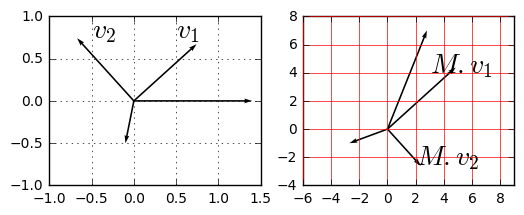

In [7]:
fig = plt.figure()
p1=vec[:,0]
p2=vec[:,1]
p3=np.array([-.1,-0.5])
p4=np.array([1.4,0])
P1=np.dot(M,p1)
P2=np.dot(M,p2)
P3=np.dot(M,p3)
P4=np.dot(M,p4)
##############
soa = np.array([[0, 0, p1[0],p1[1]], 
                [0, 0, p2[0],p2[1]], 
                [0, 0, p3[0],p3[1]],
                [0, 0, p4[0],p4[1]]])
X1, Y1, U1, V1 = zip(*soa)
ax1 = fig.add_subplot(121)
ax1 = plt.gca()
ax1.set_aspect('equal')
ax1.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1)
ax1.set_xlim([-1, 1.5])
ax1.set_ylim([-1, 1])
plt.grid()
plt.rc('grid', linestyle="-", color='red')
plt.annotate('$v_1$', 
             xy=(.5, .75),  
             xycoords='data',
             fontsize=20)
plt.annotate('$v_2$', 
             xy=(-.5, .75),  
             xycoords='data',
             fontsize=20)
ax2 = fig.add_subplot(122)
##
soa2 = np.array([[0, 0, P1[0],P1[1]], 
                 [0, 0, P2[0],P2[1]], 
                 [0, 0, P3[0],P3[1]],
                 [0, 0, P4[0],P4[1]]])
X2, Y2, U2, V2 = zip(*soa2)
ax2 = plt.gca()
ax2.set_aspect('equal')
ax2.quiver(X2, Y2, U2, V2, angles='xy', scale_units='xy', scale=1)
ax2.set_xlim([-6, 9])
ax2.set_ylim([-4, 8])
plt.grid()
plt.rc('grid', linestyle="-", color='red')
plt.annotate('$M.v_1$', 
             xy=(3, 4),  
             xycoords='data',
             fontsize=20)
plt.annotate('$M.v_2$', 
             xy=(2, -2.5),  
             xycoords='data',
             fontsize=20)
plt.show()

As we see, the eigenvectors, up to a scalar multiplication, does not change under $M$.
* every symmetric $n\times n$ matrix has exactly $n$ eigenvalues and $n$ distinct eigenvectors.
* The eigenvalues of a symmetric matrix could be negative or positive
* The eigenvlaues of a covariance matrix are all positive.

This means that a covariance matrix has a more restrictive structure. 

### Not every matrix comes with a set of eigenvectors
For example the shear tranformation $S=\begin{bmatrix}1&1\\0&1\end{bmatrix}$ has only one eigenvalue and eigenvector.

In [8]:
S=[[1,1],[0,1]]
w,v = np.linalg.eig(S)
print("Eigenvalues are:",w)
print("Eigenvectors are:",v)

Eigenvalues are: [ 1.  1.]
Eigenvectors are: [[  1.00000000e+00  -1.00000000e+00]
 [  0.00000000e+00   2.22044605e-16]]


So we give up.
Instead, for $M$, we will look for a pair of ORTHOGONAL VECTORS $v_1$ and $v_2$, whose image $Mv_1$ and $Mv_2$ are orthogonal. 
Let $u_1$ and $u_2$ be ${\bf unit}$ vectors in the dirction of $Mv_1$ and $Mv_2$. Then there are positive numbers $\sigma_1>0$ and $\sigma_2>0$ such that
\begin{align*}
Mv_1=\sigma_1 u_1\\
Mv_2=\sigma_2 u_2
\end{align*}
Before we continue, we mention that when we have $v_1$ $v_2$, we can find the image of any other matrices based on the image of $v_1$ and $v_2$. This is because, there are numbers $\alpha$ and $\beta$ such that 
$$x=\alpha v_1+\beta v_2$$
$\alpha$ and $\beta$ are the coordinates of $x$ with respect to $v_1$ and $v_2$. We can easily calculate them as follows.
$$\alpha= v_1 \cdot x,\hspace{.5in}\beta=v_2\cdot x,$$
where think of $v_1,v_2$ and $x$ and column vectors. If we let $V$ denote a matrix whose columns are $v_1$ and $v_2$
$$V=\begin{bmatrix}
\begin{matrix}
|\\v_1\\|
\end{matrix}
&
\begin{matrix}
|\\v_2\\|
\end{matrix}
\end{bmatrix},
$$
then 
$$\begin{bmatrix}\alpha\\\beta\end{bmatrix}=V^Tx$$


### Compute $Mx$ based on $U$,$\sigma$'s and $V$
Let $U$ denote the matrix whose columns are $u_1$ and $u2$, i.e,
$$U=
\begin{bmatrix}
\begin{matrix}
|\\u_1\\|
\end{matrix}
&
\begin{matrix}
|\\u_2\\|
\end{matrix}
\end{bmatrix},
$$

\begin{align*}
Mx=&M(\alpha v_1+\beta v_2)\\
=&\alpha M v_1+\beta M v_2\\
=& u_1\sigma_1\alpha+u_2\sigma_2 \beta
\end{align*}

Next, assume that $u_1=\begin{bmatrix}r_1\\r_2\end{bmatrix}$ and $u_2=\begin{bmatrix}s_1\\s_2\end{bmatrix}$.
Then 

\begin{align*}
Mx=&\begin{bmatrix}r_1\\r_2\end{bmatrix}\sigma_1\alpha+\begin{bmatrix}s_1\\s_2\end{bmatrix}\sigma_2\beta\\
=&\begin{bmatrix}
r_1&s_2\\r_2&s_2\end{bmatrix}
\times
\begin{bmatrix}
\sigma_1&0\\0&\sigma_2\end{bmatrix}
\times
\begin{bmatrix}
\alpha\\
\beta
\end{bmatrix}\\
=&U\times S\times V^Tx,
\end{align*}

where $S=\begin{bmatrix}\sigma_1&0\\0&\sigma_2\end{bmatrix}$

## The main problem left is 
How to compute $v_1$ and $v_2$. Consider the se
$$\{\|M v\|\text{ where }\|v\|=1\}$$
Then $v_1$ and $v_2$ are the maximum and minimu of this set

## Relation with PCA
SVD states that $M=USV^T$. PCA finds a transform $V$ such that $new\;data=X V$. Then we have 
$$US=XV$$

In [8]:
X=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
Y=[i*250 for i in X] #comprehensive list
data=np.array(Y).reshape(21,15)

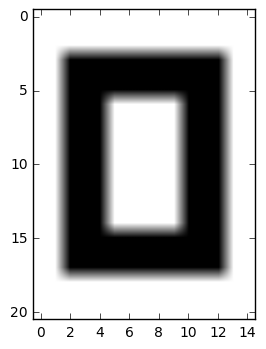

In [10]:
plt.gray()
plt.imshow(data)

In [11]:
P, D, Q = np.linalg.svd(np.array(X).reshape(21,15), full_matrices=False)

In [12]:
print(len(D),D)

15 [  1.27297277e+001   4.70051677e+000   3.29532617e+000   2.20560508e-016
   2.00073067e-016   2.70815423e-017   3.00162465e-033   7.73919998e-034
   1.31630820e-047   2.92968682e-050   2.81465295e-051   4.25054033e-066
   1.97717908e-067   2.40348108e-083   4.81607738e-100]


The only 3 significat eigenvectors are $[\sigma_1=12.8,\sigma_2=4.7,\sigma_3=3.3]$, therefore, with great accuracy
$$M=12.8u_1v_1^t+4.7u_2v_2^t+3.3u_3v_3^t$$.

In [13]:
#print(np.round(P,3))

## Adding Noise

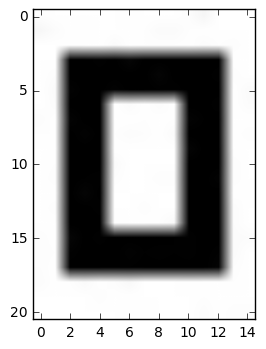

In [14]:
X2=X+np.random.normal(loc=0.0, scale=.01, size=len(X))
X3=[np.minimum(1,np.maximum(x,0)) for x in X2]
Y=[i*250 for i in X3]
data=np.array(Y).reshape(21,15)
plt.gray()
plt.imshow(data)

In [15]:
P1, D1, Q1 = np.linalg.svd(np.array(data).reshape(21,15), full_matrices=False)